In [24]:
library(dplyr)   
library(caret)
library(tidyverse)
library(recipes)
library(pROC)
library(caTools)


options(repr.plot.width = 20, repr.plot.height =10, repr.plot.res = 100)


load(file = "C:/Users/abonini/Desktop/Analysis/Sources/LIVERTRANSPLANT/Modello/df.Rdata")

In [25]:
tmp <- subset(df, select = -c(deg_cat))           #hot encoding

#define one-hot encoding function
dummy <- dummyVars(" ~ .", data=tmp)

#perform one-hot encoding on data frame
final_df <- data.frame(predict(dummy, newdata=tmp))


final_df$deg_cat <- df$deg_cat


df <- final_df

## Data partition

In [26]:
#make this example reproducible
set.seed(1)

#use 70% of dataset as training set and 30% as test set
sample <- sample.split(df$deg_cat, SplitRatio = 0.7)
train  <- subset(df, sample == TRUE)
test   <- subset(df, sample == FALSE)


TrainClasses <- train$deg_cat
TrainData <- subset(train,select= -deg_cat)
TestClasses <- test$deg_cat
TestData <- subset(test,select= -deg_cat)

## Model

In [49]:
ctrl <- trainControl(method = "repeatedcv", 
                 number = 10, 
                 savePredictions = "final",classProbs=TRUE,verboseIter=TRUE, search= "random") 

#summaryFunction = multiClassSummary (to keep all metrics)

In [50]:

model_svmPoly <- train(x=TrainData, y=TrainClasses, 
               method = "svmPoly", scale= FALSE) 

In [51]:

model_svmRadial <- train(x=TrainData, y=TrainClasses, 
               method = "svmRadial", scale= FALSE) 

Warning message in .local(x, ...):
"Variable(s) `' constant. Cannot scale data."


In [52]:

model_svmLinear <- train(x=TrainData, y=TrainClasses, 
               method = "svmLinear", scale= FALSE)

# Results

Support Vector Machines with Polynomial Kernel 

747 samples
183 predictors
  3 classes: 'Accettabile', 'Complicato', 'Ottimo' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 747, 747, 747, 747, 747, 747, ... 
Resampling results across tuning parameters:

  degree  scale  C     Accuracy   Kappa     
  1       0.001  0.25  0.4810965  0.00000000
  1       0.001  0.50  0.4878006  0.01506839
  1       0.001  1.00  0.5337159  0.11573849
  1       0.010  0.25  0.5763830  0.21229479
  1       0.010  0.50  0.5792475  0.22367007
  1       0.010  1.00  0.5779735  0.22527562
  1       0.100  0.25  0.5652849  0.23126163
  1       0.100  0.50  0.5631650  0.24998270
  1       0.100  1.00  0.5591608  0.25234081
  2       0.001  0.25  0.4889856  0.01756736
  2       0.001  0.50  0.5365787  0.12187961
  2       0.001  1.00  0.5699112  0.19778190
  2       0.010  0.25  0.5798782  0.22495894
  2       0.010  0.50  0.5720161  0.22233744
  2       0.010  1.00  0.5637729  0.

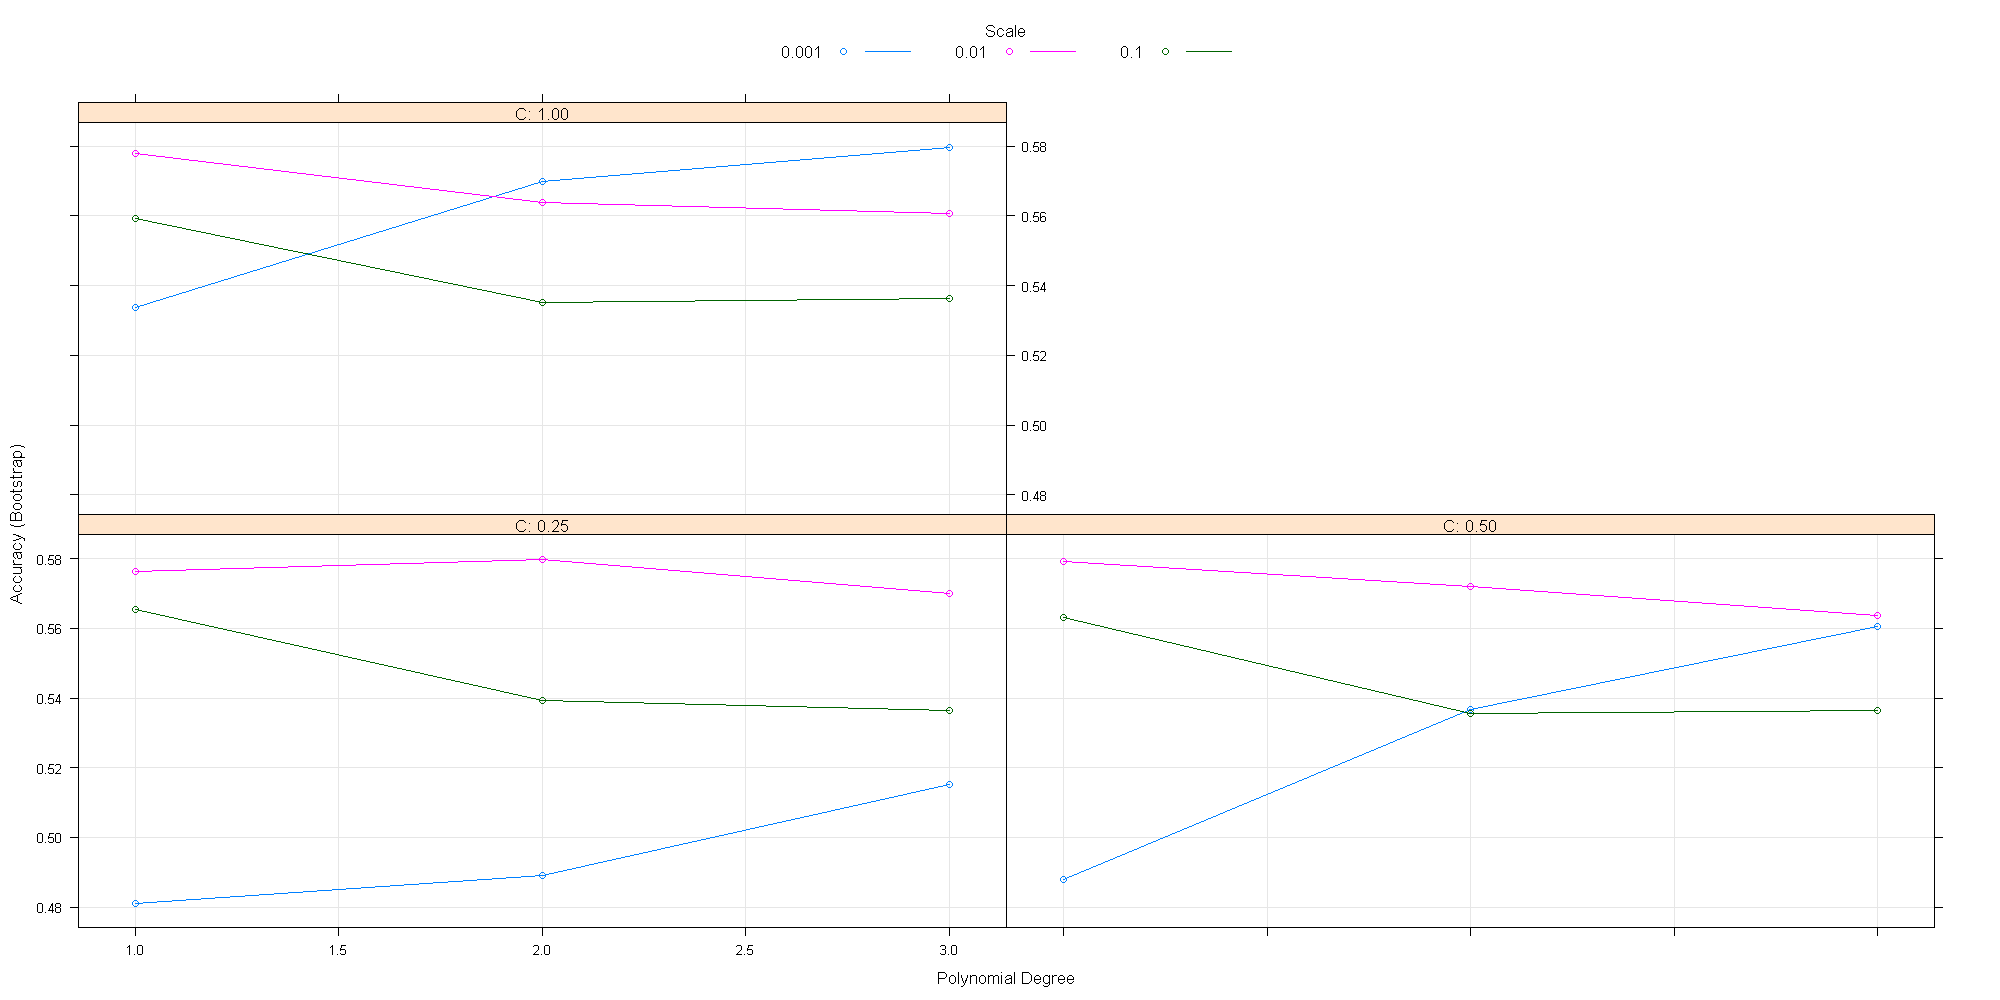

In [53]:
print(model_svmPoly)
plot(model_svmPoly)

Support Vector Machines with Radial Basis Function Kernel 

747 samples
183 predictors
  3 classes: 'Accettabile', 'Complicato', 'Ottimo' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 747, 747, 747, 747, 747, 747, ... 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.25  0.5797110  0.2247357
  0.50  0.5776403  0.2252102
  1.00  0.5693803  0.2297439

Tuning parameter 'sigma' was held constant at a value of 0.01599667
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.01599667 and C = 0.25.


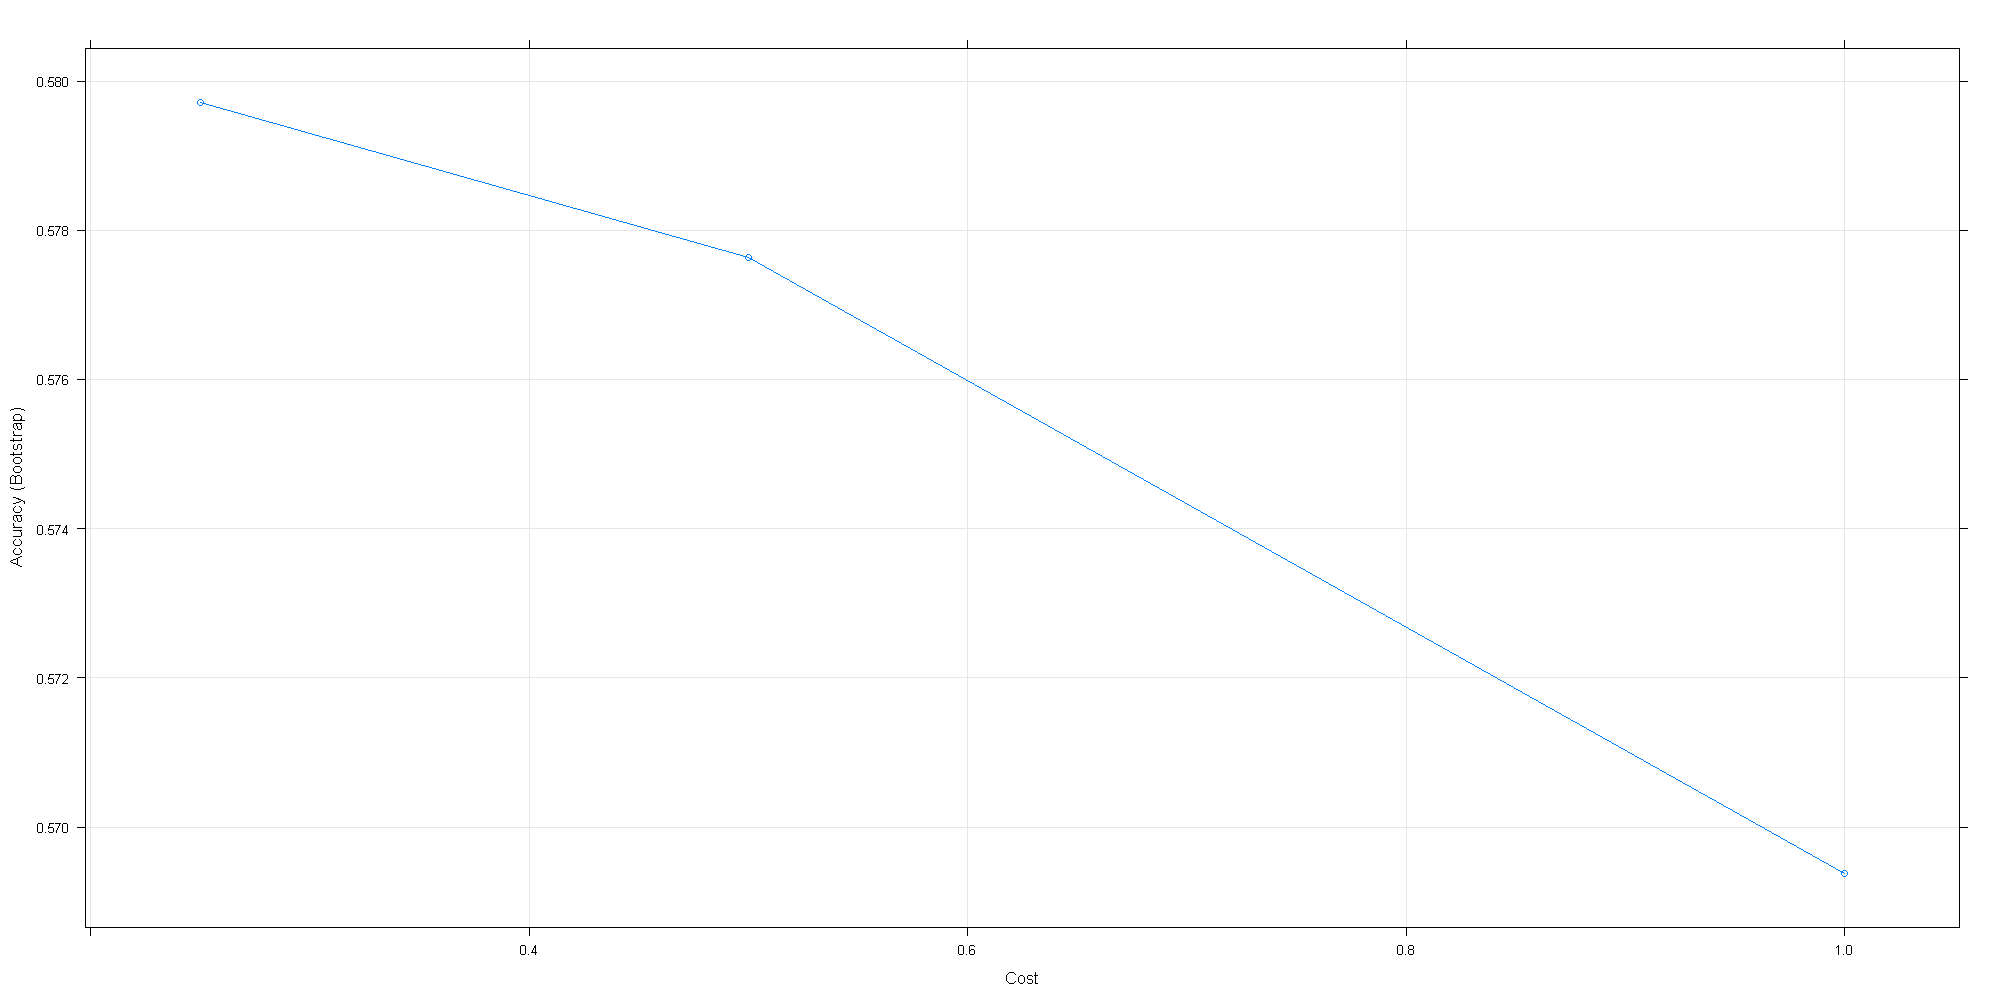

In [54]:
print(model_svmRadial)
plot(model_svmRadial)

In [55]:
print(model_svmLinear)
plot(model_svmLinear)

Support Vector Machines with Linear Kernel 

747 samples
183 predictors
  3 classes: 'Accettabile', 'Complicato', 'Ottimo' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 747, 747, 747, 747, 747, 747, ... 
Resampling results:

  Accuracy   Kappa    
  0.5339466  0.2157365

Tuning parameter 'C' was held constant at a value of 1


ERROR: Error in plot.train(model_svmLinear): There are no tuning parameters with more than 1 value.



Call:
summary.resamples(object = results)

Models: Poly, Radial, Linear 
Number of resamples: 25 

Accuracy 
            Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
Poly   0.5370370 0.5650558 0.5765125 0.5798782 0.5969582 0.6210526    0
Radial 0.5193798 0.5613383 0.5776173 0.5797110 0.5928571 0.6308244    0
Linear 0.4912281 0.5072464 0.5274725 0.5339466 0.5574913 0.5802920    0

Kappa 
            Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
Poly   0.1320131 0.1952816 0.2275360 0.2249589 0.2603736 0.2852789    0
Radial 0.1271894 0.1945756 0.2174161 0.2247357 0.2461864 0.2989779    0
Linear 0.1485878 0.1788992 0.2029691 0.2157365 0.2571168 0.2968715    0


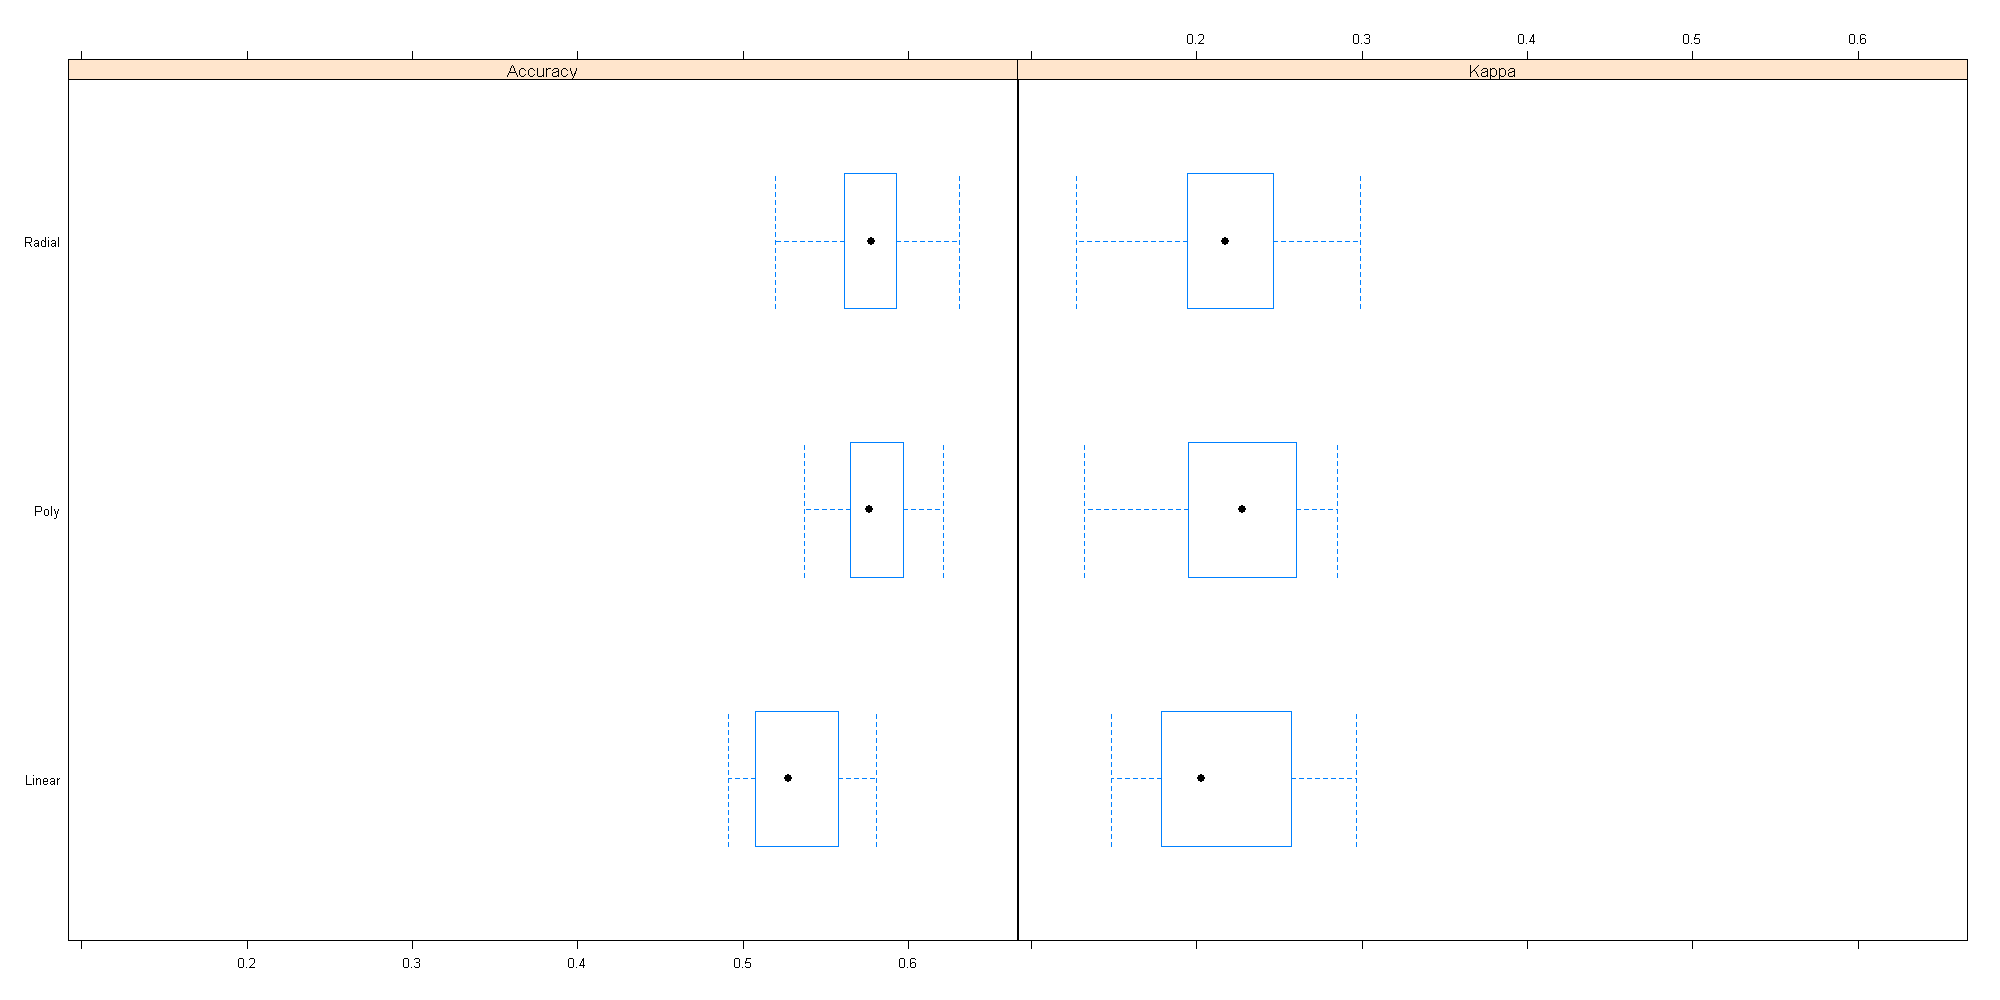

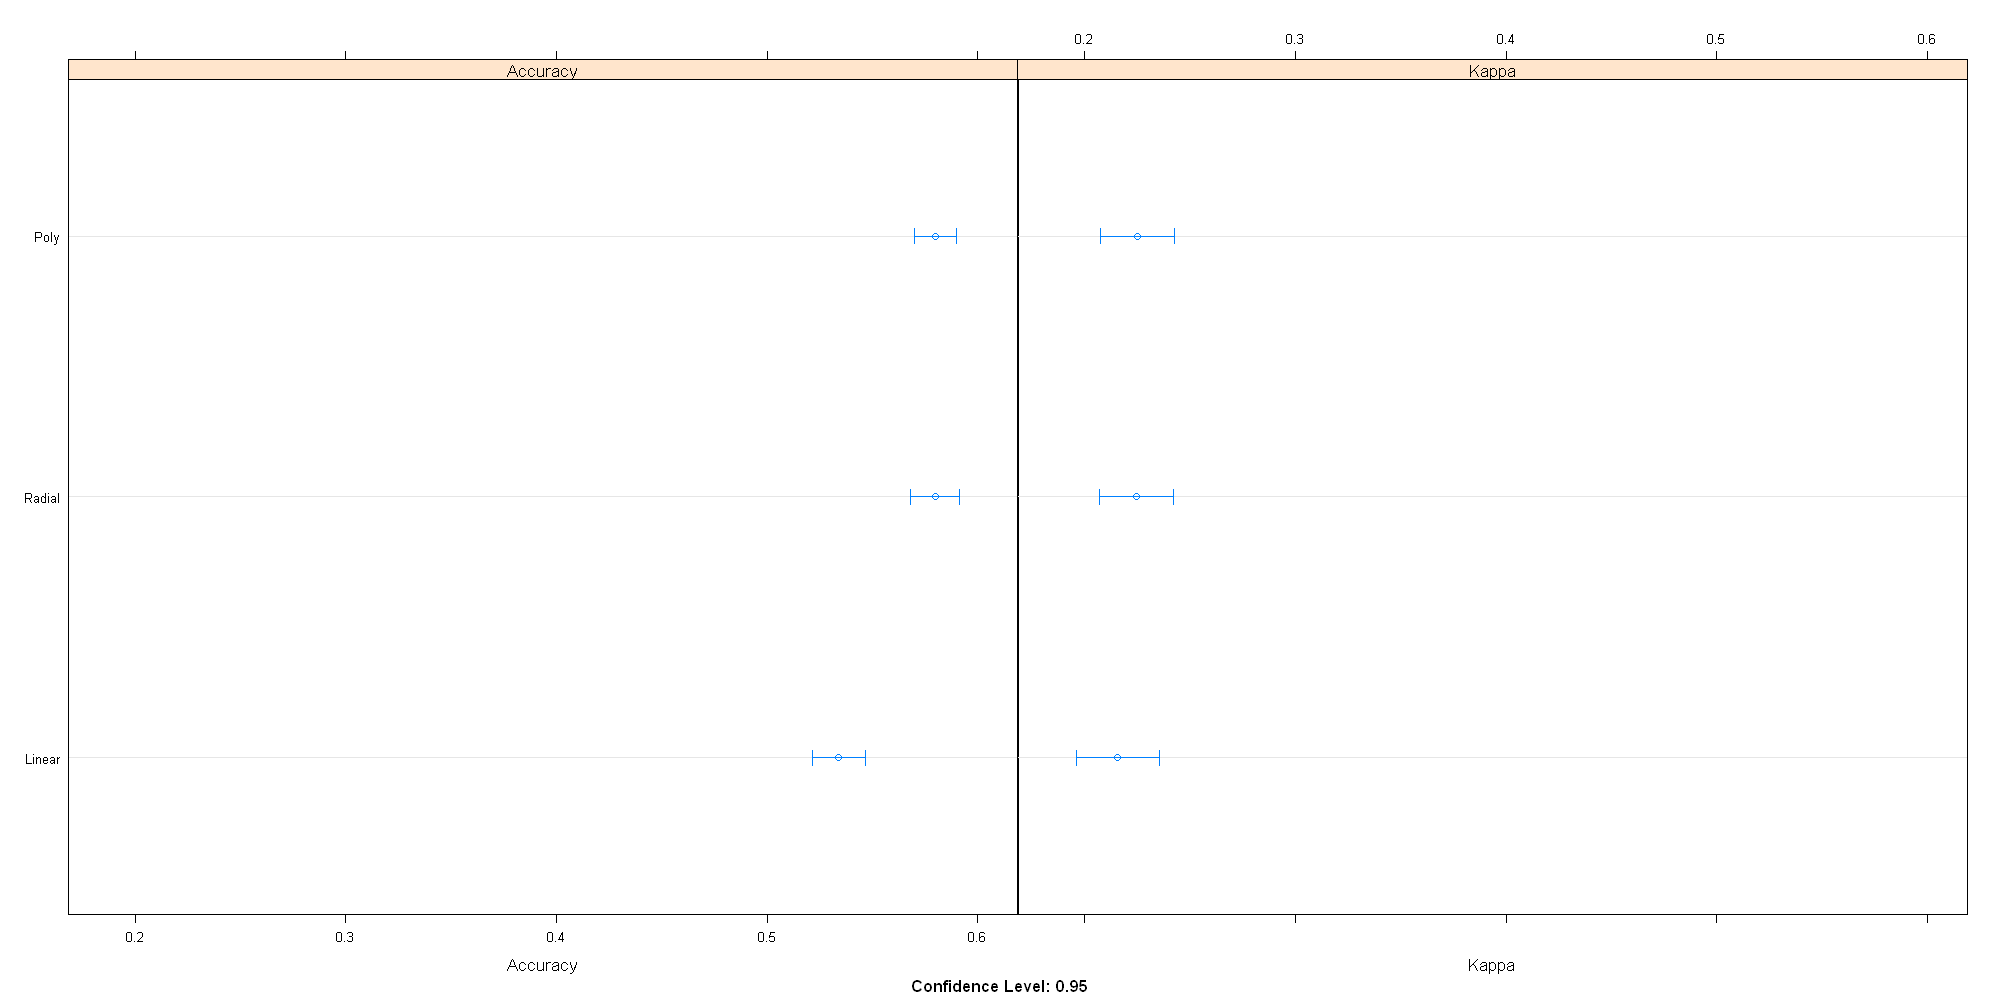

In [56]:
# collect resamples
results <- resamples(list(Poly=model_svmPoly,  Radial=model_svmRadial, Linear=model_svmLinear))
# summarize the distributions
summary(results)
# boxplots of results
bwplot(results)
# dot plots of results
dotplot(results)

# Prediction

In [58]:
pred_svmRadial <- predict(model_svmRadial,TestData)
pred_svmRadial.prob <- predict(model_svmRadial,TestData, type="prob")


result <- confusionMatrix(TestClasses,  pred_svmRadial) 
result
result$byClass

Warning message in method$prob(modelFit = modelFit, newdata = newdata, submodels = param):
"kernlab class probability calculations failed; returning NAs"


Confusion Matrix and Statistics

             Reference
Prediction    Accettabile Complicato Ottimo
  Accettabile         140         16      0
  Complicato           72         50      0
  Ottimo               41          2      0

Overall Statistics
                                          
               Accuracy : 0.5919          
                 95% CI : (0.5359, 0.6462)
    No Information Rate : 0.7882          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.2393          
                                          
 Mcnemar's Test P-Value : <2e-16          

Statistics by Class:

                     Class: Accettabile Class: Complicato Class: Ottimo
Sensitivity                      0.5534            0.7353            NA
Specificity                      0.7647            0.7154         0.866
Pos Pred Value                   0.8974            0.4098            NA
Neg Pred Value                   0.3152           

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
Class: Accettabile,0.5533597,0.7647059,0.8974359,0.3151515,0.8974359,0.5533597,0.6845966,0.788162,0.4361371,0.4859813,0.6590328
Class: Complicato,0.7352941,0.7154150,0.4098361,0.9095477,0.4098361,0.7352941,0.5263158,0.211838,0.1557632,0.3800623,0.7253546
Class: Ottimo,NA,0.8660436,NA,NA,0.0000000,NA,NA,0.000000,0.0000000,0.1339564,NA


In [59]:
roc_svmRadial <- multiclass.roc(TestClasses, as.numeric(pred_svmRadial))
roc_svmRadial

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases




Call:
multiclass.roc.default(response = TestClasses, predictor = as.numeric(pred_svmRadial))

Data: as.numeric(pred_svmRadial) with 3 levels of TestClasses: Accettabile, Complicato, Ottimo.
Multi-class area under the curve: 0.4813